In [2]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
#load the dataset
df=pd.read_csv("Zoo.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [190]:
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [191]:
#Check null values
df.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [192]:
#Check data types
df.dtypes

animal_name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [193]:
df["animal_name"].unique()

array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',
       

In [194]:
#Convert categorical data into numerical format
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["animal_name"]= le.fit_transform(df["animal_name"])
le_name_mapping = dict(zip(le.classes_,le.transform(le.classes_)))
#print("features", animal name)
print("mapping", le_name_mapping)

mapping {'aardvark': 0, 'antelope': 1, 'bass': 2, 'bear': 3, 'boar': 4, 'buffalo': 5, 'calf': 6, 'carp': 7, 'catfish': 8, 'cavy': 9, 'cheetah': 10, 'chicken': 11, 'chub': 12, 'clam': 13, 'crab': 14, 'crayfish': 15, 'crow': 16, 'deer': 17, 'dogfish': 18, 'dolphin': 19, 'dove': 20, 'duck': 21, 'elephant': 22, 'flamingo': 23, 'flea': 24, 'frog': 25, 'fruitbat': 26, 'giraffe': 27, 'girl': 28, 'gnat': 29, 'goat': 30, 'gorilla': 31, 'gull': 32, 'haddock': 33, 'hamster': 34, 'hare': 35, 'hawk': 36, 'herring': 37, 'honeybee': 38, 'housefly': 39, 'kiwi': 40, 'ladybird': 41, 'lark': 42, 'leopard': 43, 'lion': 44, 'lobster': 45, 'lynx': 46, 'mink': 47, 'mole': 48, 'mongoose': 49, 'moth': 50, 'newt': 51, 'octopus': 52, 'opossum': 53, 'oryx': 54, 'ostrich': 55, 'parakeet': 56, 'penguin': 57, 'pheasant': 58, 'pike': 59, 'piranha': 60, 'pitviper': 61, 'platypus': 62, 'polecat': 63, 'pony': 64, 'porpoise': 65, 'puma': 66, 'pussycat': 67, 'raccoon': 68, 'reindeer': 69, 'rhea': 70, 'scorpion': 71, 'seah

In [195]:
df.dtypes

animal_name    int32
hair           int64
feathers       int64
eggs           int64
milk           int64
airborne       int64
aquatic        int64
predator       int64
toothed        int64
backbone       int64
breathes       int64
venomous       int64
fins           int64
legs           int64
tail           int64
domestic       int64
catsize        int64
type           int64
dtype: object

In [196]:
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [197]:
x= df[["hair","feathers","eggs","milk","airborne","aquatic","predator","toothed","backbone","breathes","venomous","fins","legs","tail","domestic","catsize"]]
y=df["type"]

In [198]:
x.shape

(101, 16)

In [199]:
y.shape

(101,)

In [200]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [201]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(80, 16)
(80,)
(21, 16)
(21,)


In [202]:
y_test.value_counts()

type
1    9
2    5
7    3
4    3
6    1
Name: count, dtype: int64

In [203]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [204]:
#create model for KNN
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=int(np.sqrt(len(x_train))), metric="euclidean")

In [205]:
model.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=8)

In [206]:
#Generate prediction on Test data
y_pred = model.predict(x_test)
print(list(zip(y_test, y_pred)))

[(2, 2), (1, 1), (1, 1), (2, 2), (7, 4), (6, 6), (4, 4), (7, 4), (1, 1), (1, 1), (1, 1), (7, 4), (4, 4), (2, 2), (1, 1), (1, 4), (1, 1), (4, 4), (1, 1), (2, 2), (2, 2)]


In [207]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

In [208]:
x_min, x_max = x_train_pca[:, 0].min() - 1, x_train_pca[:, 0].max() + 1
y_min, y_max =x_train_pca[:, 1].min() - 1, x_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max,  0.02), np.arange(y_min, y_max,  0.02))

In [209]:
grid = np.c_[xx.ravel(), yy.ravel()]
grid_original = pca.inverse_transform(grid)
z = model.predict(grid_original)
z = z.reshape(xx.shape)

c:\Users\Tejaswi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


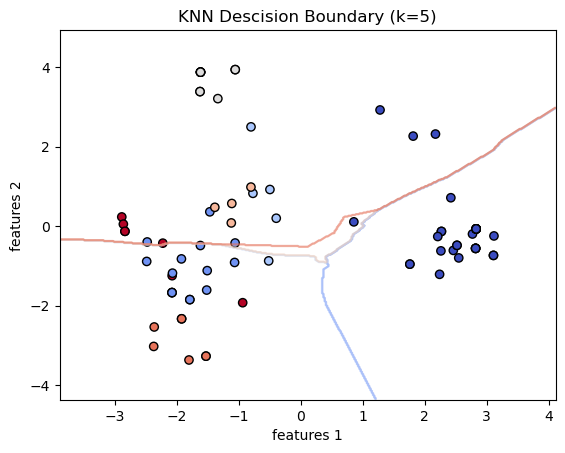

In [210]:
plt.contour(xx,yy,z, alpha = 0.4, cmap = plt.cm.coolwarm)
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.coolwarm)
plt.title('KNN Descision Boundary (k=5)')
plt.xlabel("features 1")
plt.ylabel("features 2")
#for (x, y), name in zip(x_train_pca, df['animal_name']):
    #plt.text(x + 0.1, y+ 0.1, name)
plt.show()

In [211]:
feature_order = x.columns.tolist()

In [212]:
#Check Model Performance
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm = confusion_matrix(y_test,y_pred)
print(cfm)

print("Classification report:")
print(classification_report(y_test,y_pred))

acc = accuracy_score(y_test,y_pred)
print("Accuracy of the Model: ",acc)

[[8 0 1 0 0]
 [0 5 0 0 0]
 [0 0 3 0 0]
 [0 0 0 1 0]
 [0 0 3 0 0]]
Classification report:
              precision    recall  f1-score   support

           1       1.00      0.89      0.94         9
           2       1.00      1.00      1.00         5
           4       0.43      1.00      0.60         3
           6       1.00      1.00      1.00         1
           7       0.00      0.00      0.00         3

    accuracy                           0.81        21
   macro avg       0.69      0.78      0.71        21
weighted avg       0.78      0.81      0.77        21

Accuracy of the Model:  0.8095238095238095


c:\Users\Tejaswi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Tejaswi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Tejaswi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [213]:
x = x.values

In [214]:
#Save the Model
import pickle
with open("model.pkl", 'wb') as p:
    pickle.dump(model,p)
